In [81]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.3 MB/s eta 0:00:00


In [36]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf

import statsmodels.api as sm
import statsmodels.tsa.api as smt

from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pm


In [2]:
def test_stationarity(ts):
  MA = ts.rolling(window=96).mean()   ### window 안에는 몇개의 데이터를 사용할 것 인지 정의
  MSTD = ts.rolling(window=96).std()

  #plot
  plt.figure(figsize=(15,5))
  origin = plt.plot(ts, color='blue', label='origin')
  mean = plt.plot(MA, color='red', label='Rolling Mean')
  std = plt.plot(MSTD, color='green', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Std')
  plt.show(block=False)

In [3]:
def tsplot(y, lags=None, figsize=(10,5), style='bmh', maxlag=300 ):
  if not isinstance(y,pd.Series):
     y=pd.Series(y)
     
  with plt.style.context(style):
      fig = plt.figure(figsize=figsize)
      layout=(2,2)
      ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
      acf_ax = plt.subplot2grid(layout, (1,0))
      pacf_ax = plt.subplot2grid(layout, (1,1))

      y.plot(ax=ts_ax)

      result = sm.tsa.stattools.adfuller(y, autolag='AIC', maxlag=maxlag)

      ts_ax.set_title(f"PLOT Dickey-Fuller : p-value:{result[1] : .3f} ")
      smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
      smt.graphics.plot_acf(y, lags=lags, ax=pacf_ax)
      plt.tight_layout()
      print(f'ADF Statistic : {result[0] :.3f}')
      print(f'n_lags : {result[2]}')
      print(f'p-value : {result[1]}')
      for key,value in result[4].items():
        print('Critical Values')
        print(f'  {key} , {value}')                    


In [4]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# ▶ pd.set option
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)  

file_path = './drive/MyDrive/Project/arima/arima_model.gz'

df = pd.read_pickle(file_path)
df.head()

Floor1_z1_Light(kW)  Floor1_z1_Plug(kW)  \
Date                                                           
2018-07-01 00:00:00                12.94               18.56   
2018-07-01 00:01:00                12.97               18.55   
2018-07-01 00:02:00                12.97               18.55   
2018-07-01 00:03:00                12.98               18.58   
2018-07-01 00:04:00                13.01               18.60   

                     Floor1_z2_AC1(kW)  Floor1_z2_AC2(kW)  Floor1_z2_AC3(kW)  \
Date                                                                           
2018-07-01 00:00:00              45.24               0.01               0.01   
2018-07-01 00:01:00              45.28               0.02               0.01   
2018-07-01 00:02:00              45.24               0.01               0.01   
2018-07-01 00:03:00              45.26               0.02               0.01   
2018-07-01 00:04:00              45.22               0.02               0.01   

                     Floor1_z2_AC4(kW)  Floor1_z2_Light(kW)  \
Date                                                          
2018-07-01 00:00:00               0.00                13.76   
2018-07-01 00:01:00               0.01                13.76   
2018-07-01 00:02:00               0.01                13.79   
2018-07-01 00:03:00               0.00                13.81   
2018-07-01 00:04:00               0.01                13.83   

                     Floor1_z2_Plug(kW)  Floor1_z3_Light(kW)  \
Date                                                           
2018-07-01 00:00:00               17.64                10.92   
2018-07-01 00:01:00               17.21                10.95   
2018-07-01 00:02:00               17.18                10.94   
2018-07-01 00:03:00               16.64                10.94   
2018-07-01 00:04:00               15.69                10.97   

                     Floor1_z3_Plug(kW)  Floor1_z4_Light(kW)  \
Date                                                           
2018-07-01 00:00:00                0.89                35.76   
2018-07-01 00:01:00                0.87                35.81   
2018-07-01 00:02:00                0.86                35.78   
2018-07-01 00:03:00                0.85                35.83   
2018-07-01 00:04:00                0.85                35.86   

                     Floor2_z1_AC1(kW)  Floor2_z1_Light(kW)  \
Date                                                          
2018-07-01 00:00:00                0.0                 0.01   
2018-07-01 00:01:00                0.0                 0.01   
2018-07-01 00:02:00                0.0                 0.01   
2018-07-01 00:03:00                0.0                 0.01   
2018-07-01 00:04:00                0.0                 0.01   

                     Floor2_z1_Plug(kW)  Floor2_z1_S1(RH%)  \
Date                                                         
2018-07-01 00:00:00                0.15              58.93   
2018-07-01 00:01:00                0.15              58.91   
2018-07-01 00:02:00                0.15              58.94   
2018-07-01 00:03:00                0.15              58.94   
2018-07-01 00:04:00                0.15              58.94   

                     Floor2_z1_S1(degC)  Floor2_z1_S1(lux)  Floor2_z2_AC1(kW)  \
Date                                                                            
2018-07-01 00:00:00               28.36                0.0               1.08   
2018-07-01 00:01:00               28.36                0.0               1.07   
2018-07-01 00:02:00               28.36                0.0               0.88   
2018-07-01 00:03:00               28.36                0.0               1.06   
2018-07-01 00:04:00               28.36                0.0               1.06   

                     Floor2_z2_AC10(kW)  Floor2_z2_AC11(kW)  \
Date                                                          
2018-07-01 00:00:00                1.07                 0.0   
2018-07-01 00:01:00                1.

In [6]:
# Colums 내에 'KW'들어 있는 항을 가지고 합산
df_powerMeter = df.loc[:, df.columns.str.contains('kW')].copy()

# ▶ Sum up demands of all power meters
df_powerMeter = df_powerMeter.sum(axis=1).rename('load')
df = pd.DataFrame(df_powerMeter)

In [7]:
df

load
Date                       
2018-07-01 00:00:00  176.31
2018-07-01 00:01:00  176.04
2018-07-01 00:02:00  174.54
2018-07-01 00:03:00  175.72
2018-07-01 00:04:00  174.90
...                     ...
2019-12-31 23:55:00   80.44
2019-12-31 23:56:00   91.45
2019-12-31 23:57:00  123.34
2019-12-31 23:58:00  109.65
2019-12-31 23:59:00   71.00

[790560 rows x 1 columns]

### 데이터 확인

In [8]:
### feature 생성
df = df.reset_index()
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.year
df['hour']=df['Date'].dt.hour
df['weekday']=df['Date'].dt.weekday
df['day'] = df['Date'].dt.day
df['date']=df['Date'].dt.strftime('%Y-%m')
df['year_day']=df['Date'].dt.date

df['workingday'] = np.where(df['weekday']>4, 0, 1)

df

Date    load  year  month  hour  weekday  day     date  \
0      2018-07-01 00:00:00  176.31  2018   2018     0        6    1  2018-07   
1      2018-07-01 00:01:00  176.04  2018   2018     0        6    1  2018-07   
2      2018-07-01 00:02:00  174.54  2018   2018     0        6    1  2018-07   
3      2018-07-01 00:03:00  175.72  2018   2018     0        6    1  2018-07   
4      2018-07-01 00:04:00  174.90  2018   2018     0        6    1  2018-07   
...                    ...     ...   ...    ...   ...      ...  ...      ...   
790555 2019-12-31 23:55:00   80.44  2019   2019    23        1   31  2019-12   
790556 2019-12-31 23:56:00   91.45  2019   2019    23        1   31  2019-12   
790557 2019-12-31 23:57:00  123.34  2019   2019    23        1   31  2019-12   
790558 2019-12-31 23:58:00  109.65  2019   2019    23        1   31  2019-12   
790559 2019-12-31 23:59:00   71.00  2019   2019    23        1   31  2019-12   

          year_day  workingday  
0       2018-07-01           0  
1       2018-07-01           0  
2       2018-07-01           0  
3       2018-07-01           0  
4       2018-07-01           0  
...            ...         ...  
790555  2019-12-31           1  
790556  2019-12-31           1  
790557  2019-12-31           1  
790558  2019-12-31           1  
790559  2019-12-31           1  

[790560 rows x 10 columns]

### 주중 / 주말 분포

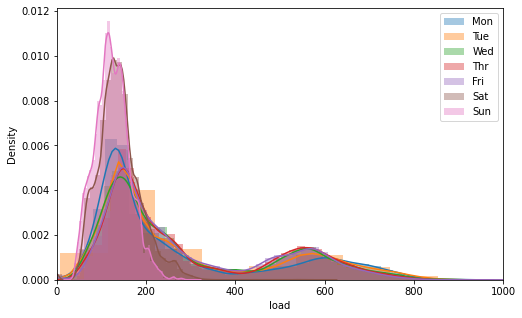

In [9]:
# ▶ 주중, 주말 비교 
df.groupby('workingday')['load'].mean()

# ▶ 요일 비교
sns.distplot(df[df['weekday']==0]['load'], label='Mon');
sns.distplot(df[df['weekday']==1]['load'], label='Tue');
sns.distplot(df[df['weekday']==2]['load'], label='Wed');
sns.distplot(df[df['weekday']==3]['load'], label='Thr');
sns.distplot(df[df['weekday']==4]['load'], label='Fri');
sns.distplot(df[df['weekday']==5]['load'], label='Sat');
sns.distplot(df[df['weekday']==6]['load'], label='Sun');
plt.legend()
plt.xlim(0,1000)
plt.gcf().set_size_inches(8, 5)

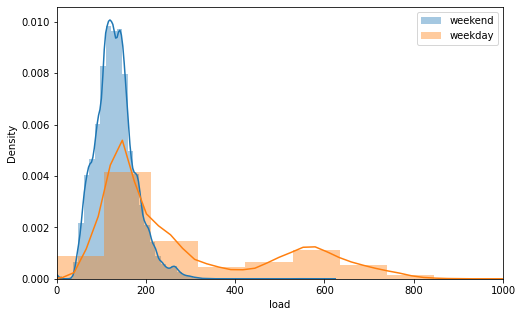

In [10]:
# ▶ 평일 주말 비교
sns.distplot(df[df['workingday']==0]['load'], label='weekend');
sns.distplot(df[df['workingday']==1]['load'], label='weekday');
plt.legend()
plt.xlim(0,1000)
plt.gcf().set_size_inches(8, 5)

## 성분 분석 / 계절성 인자 확인

In [11]:
group_date = df.groupby(['date'], as_index=False).agg(
    avg_load = ('load', 'mean')
)
group_date

date    avg_load
0   2018-07  270.666745
1   2018-08  274.165350
2   2018-09  249.789465
3   2018-10  239.558076
4   2018-11  219.444206
5   2018-12  226.983343
6   2019-01  217.320790
7   2019-02  219.843163
8   2019-03  244.801063
9   2019-04  251.632099
10  2019-05  277.812280
11  2019-06  261.085780
12  2019-07  254.460363
13  2019-08  255.034922
14  2019-09  241.820944
15  2019-10  240.455619
16  2019-11  214.406103
17  2019-12  186.080892

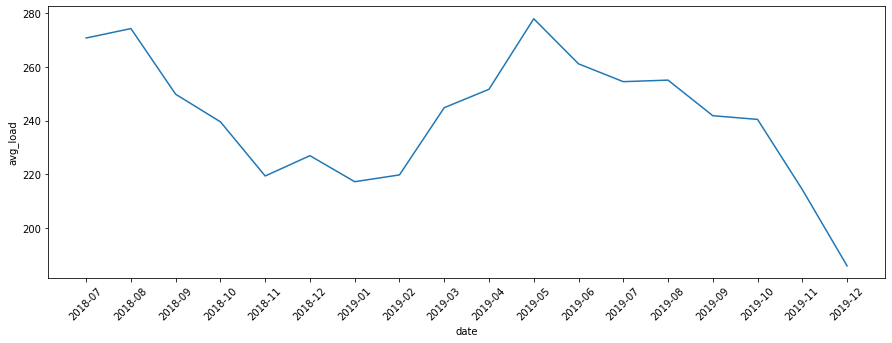

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

sns.lineplot(x='date', y='avg_load', data=group_date, ax=ax)
ax.tick_params(axis='x', labelrotation=45)

<Axes: >

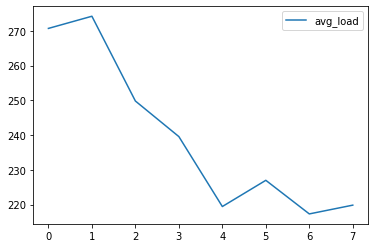

In [58]:
group_date.iloc[:8].plot()

ADF Statistic : -1.426
n_lags : 7
p-value : 0.56951279204279
Critical Values
  1% , -4.331573
Critical Values
  5% , -3.23295
Critical Values
  10% , -2.7487


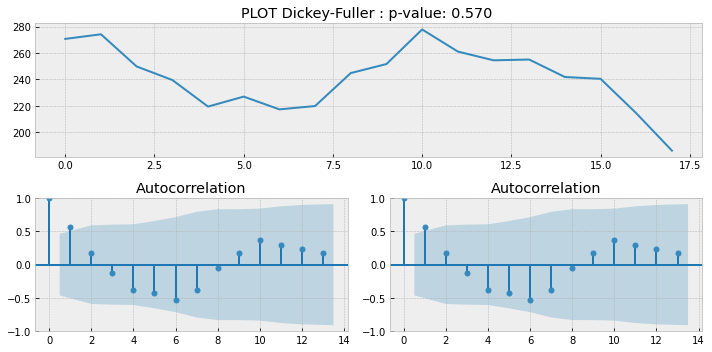

In [56]:
tsplot(group_date['avg_load'], maxlag=7)

In [13]:
group = df.groupby(['year_day'], as_index=False).agg(
    avg_load = ('load', 'mean')
)
group

year_day    avg_load
0    2018-07-01  159.487049
1    2018-07-02  379.548632
2    2018-07-03  337.542028
3    2018-07-04  328.728361
4    2018-07-05  333.111049
..          ...         ...
544  2019-12-27  264.951424
545  2019-12-28  125.915667
546  2019-12-29  110.837438
547  2019-12-30   93.387938
548  2019-12-31   92.833660

[549 rows x 2 columns]

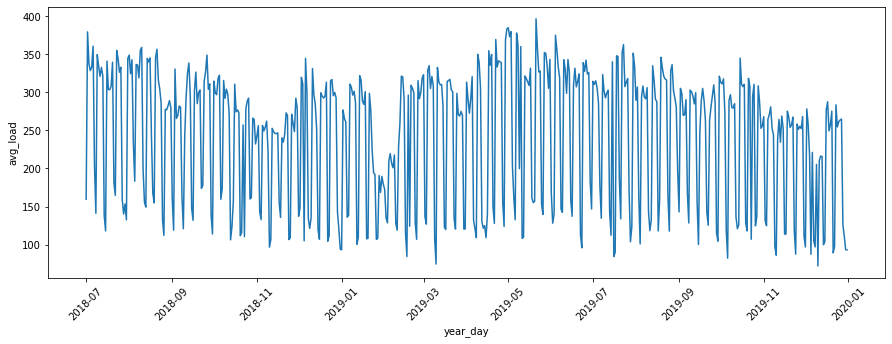

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

sns.lineplot(x='year_day', y='avg_load', data=group, ax=ax)
ax.tick_params(axis='x', labelrotation=45)

### decomposittion

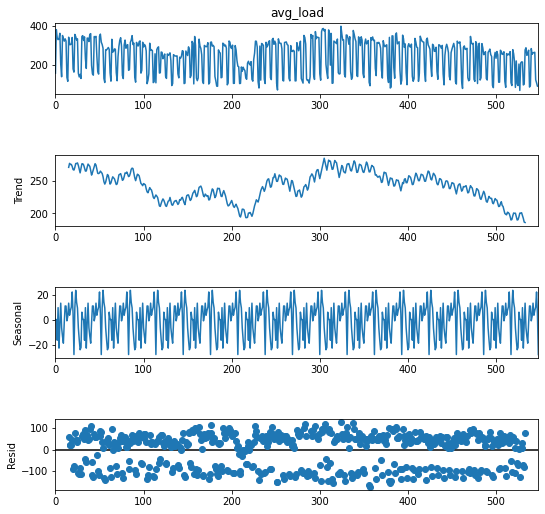

In [15]:
### 성분분해
dec = sm.tsa.seasonal_decompose(group['avg_load'], period=31, model='addictive').plot() ### 
dec.set_size_inches(8,8)

ADF Statistic : -4.192
n_lags : 6
p-value : 0.0006797002737011261
Critical Values
  1% , -3.442472769145813
Critical Values
  5% , -2.8668873212324817
Critical Values
  10% , -2.5696179384812297


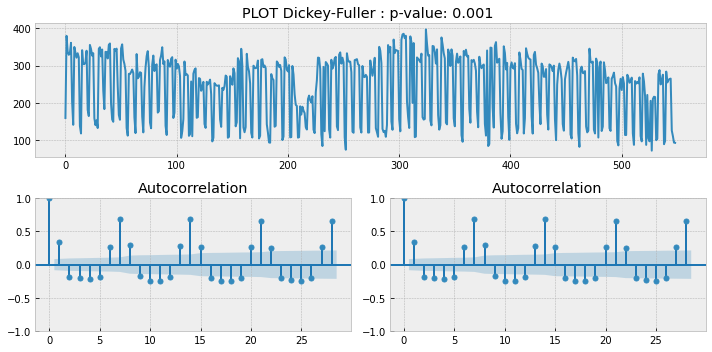

In [16]:
tsplot(group['avg_load'], maxlag=6)

<Axes: >

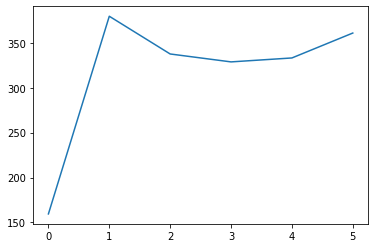

In [17]:
group.iloc[:6]['avg_load'].plot()

ADF Statistic : -2.365
n_lags : 20
p-value : 0.15185144521557908
Critical Values
  1% , -3.4427957890025533
Critical Values
  5% , -2.867029512430173
Critical Values
  10% , -2.5696937122646926


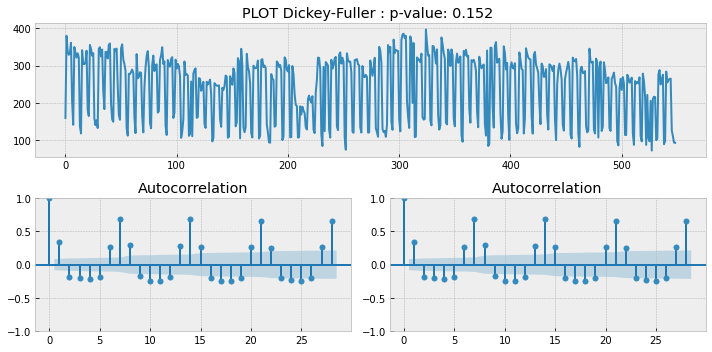

In [18]:
tsplot(group['avg_load'], maxlag=20)

<Axes: >

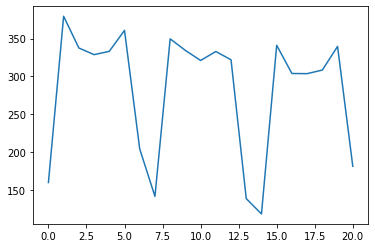

In [19]:
group.iloc[:21]['avg_load'].plot()

### 하루동안의 seanonal 이 존재함 확인

In [21]:
### pivot table을 만들어 하루동안의 시간변화 확인
day_idx = df['hour']
day_colums = df['year_day']
day_pivot = df.pivot_table(index=day_idx, columns=day_colums, values='load', aggfunc='mean', fill_value=0)
day_pivot

year_day  2018-07-01  2018-07-02  2018-07-03  2018-07-04  2018-07-05  \
hour                                                                   
0         176.261667  165.985333  131.899000  151.461667  141.166833   
1         177.300000  161.674667  108.551333  150.612167  138.617000   
2         177.048833  159.642667  107.407500  153.343333  138.730333   
3         175.129167  161.676333  105.860000  153.721000  136.327667   
4         183.175000  175.787333  125.858333  166.073167  147.561333   
5         181.883667  170.425333  136.880167  167.860333  155.378500   
6         160.375833  196.004333  175.991667  148.085667  161.575333   
7         157.988667  388.554333  339.218167  345.777500  310.369500   
8         142.767833  879.319167  732.867333  753.655333  682.235500   
9         117.386000  790.151667  672.135000  618.404667  604.616667   
10        118.581667  788.247000  617.890667  592.019167  603.597333   
11        120.378000  623.208000  496.177333  464.300833  477.598167   
12        123.815667  347.851667  257.852333  292.340167  261.235667   
13        125.621000  830.949667  672.045833  700.819667  696.772833   
14        125.465333  772.427500  616.441333  577.232667  584.519000   
15        124.362667  680.769833  606.372000  582.802000  601.417000   
16        136.078000  505.436167  470.374000  436.875333  453.814500   
17        165.169000  262.390833  281.021667  231.310167  268.385167   
18        188.052833  242.319833  361.238333  264.898667  327.930333   
19        203.833000  226.239000  352.938833  249.956833  308.598833   
20        215.054833  166.146000  254.252000  201.979167  212.896667   
21        185.634000  144.235000  172.006167  189.537833  186.486000   
22        180.671833  137.935000  154.113833  155.803000  215.566833   
23        165.654667  131.790500  151.615833  140.610333  179.268167   

year_day  2018-07-06  2018-07-07  2018-07-08  2018-07-09  2018-07-10  \
hour                                                                   
0         167.399833  183.575500  152.437833  140.007667  121.010667   
1         167.501000  182.406500  147.046000  139.839833  119.471167   
2         167.161667  180.173500  145.518333  138.502333  118.479000   
3         163.560000  180.999500  146.349500  140.350167  118.955000   
4         178.709167  191.836000  156.714000  159.472167  137.257167   
5         181.884000  188.013833  149.102000  165.526667  110.145000   
6         194.496500  142.066667  117.651000  180.640667  150.442167   
7         331.265000  187.002333  103.975167  331.130833  323.656833   
8         665.421333  257.087833  100.827000  759.284833  645.279333   
9         587.234000  254.040000  106.180667  701.308333  655.695333   
10        597.176500  272.682500  113.984833  690.622667  643.117167   
11        472.711167  261.266000  117.167667  537.229333  525.747333   
12        250.686167  238.355500  121.729667  270.065500  292.571333   
13        648.317000  270.565500  121.520667  719.769833  702.157667   
14        580.543833  254.757333  121.693333  671.937000  648.034833   
15        565.802500  248.647000  123.824833  622.108833  630.553333   
16        466.915333  221.785833  161.735833  513.366333  482.988167   
17        353.154833  156.989333  164.567833  326.907000  305.763500   
18        472.957500  173.552333  184.599500  311.399000  333.605833   
19        415.926167  176.255167  192.030667  288.114333  330.135833   
20        314.470000  179.843333  191.702000  192.217167  204.931333   
21        277.834833  176.754000  153.839000  148.542833  165.938833   
22        229.721000  168.342833  151.763333  126.915833  133.601333   
23        209.454500  146.343000  141.305000  116.377333  124.201667   

year_day  2018-07-11  2018-07-12  2018-07-13  2018-07-14  2018-07-15  \
hour                                                                   
0         123.411333  142.624667  156.394333  131.714000  118.678167   
1         123.094500  142.030000  148.

### 시간대별 확인

In [22]:
# UB, LB 계산을 위해 평균 및 표준편차 구하기 
day_pivot['mean'] =  day_pivot.apply(np.mean, axis=1)
day_pivot['std'] = day_pivot.apply(np.std, axis=1)
day_pivot[['mean', 'std']].head(5)
#df_temp_pivot.head()
# UB, LB
day_pivot['UB'] = day_pivot['mean'] + 2*day_pivot['std']
day_pivot['LB'] = day_pivot['mean'] - 2*day_pivot['std']

<Figure size 1728x864 with 0 Axes>

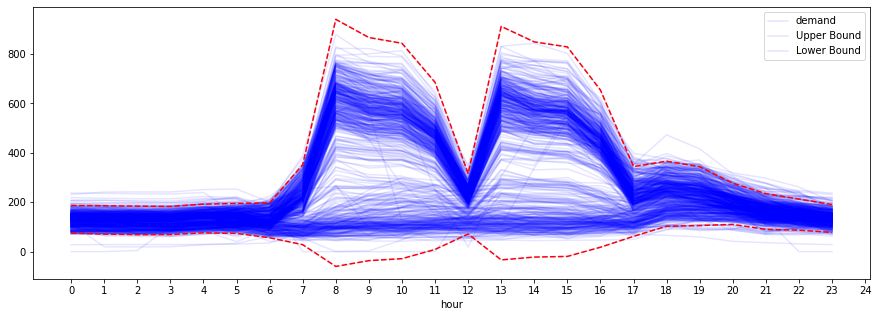

In [23]:
plt.figure(figsize=(24,12));
day_pivot.plot(figsize=(15,5),color='blue',alpha=0.1,legend=False);
plt.plot(day_pivot.index, day_pivot['UB'], linestyle='--', color='red');
plt.plot(day_pivot.index, day_pivot['LB'] , linestyle='--', color='red');
plt.xticks(range(0,25));
plt.legend(['demand', 'Upper Bound', 'Lower Bound']);

In [24]:
day_pivot.columns

Index([2018-07-01, 2018-07-02, 2018-07-03, 2018-07-04, 2018-07-05, 2018-07-06,
       2018-07-07, 2018-07-08, 2018-07-09, 2018-07-10,
       ...
       2019-12-26, 2019-12-27, 2019-12-28, 2019-12-29, 2019-12-30, 2019-12-31,
           'mean',      'std',       'UB',       'LB'],
      dtype='object', name='year_day', length=553)

ADF Statistic : -1.665
n_lags : 10
p-value : 0.44935707464810665
Critical Values
  1% , -4.068853732362312
Critical Values
  5% , -3.1271488757396453
Critical Values
  10% , -2.7017297633136095


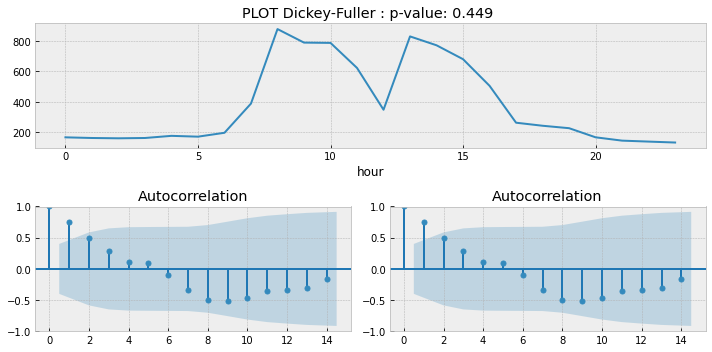

In [64]:
tsplot(day_pivot.iloc[:,1], maxlag=10)

<Axes: xlabel='hour'>

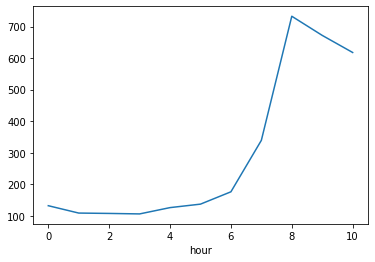

In [68]:
day_pivot.iloc[:,2][:11].plot()

ADF Statistic : 0.457
n_lags : 2
p-value : 0.983504086525111
Critical Values
  1% , -4.6651863281249994
Critical Values
  5% , -3.3671868750000002
Critical Values
  10% , -2.802960625


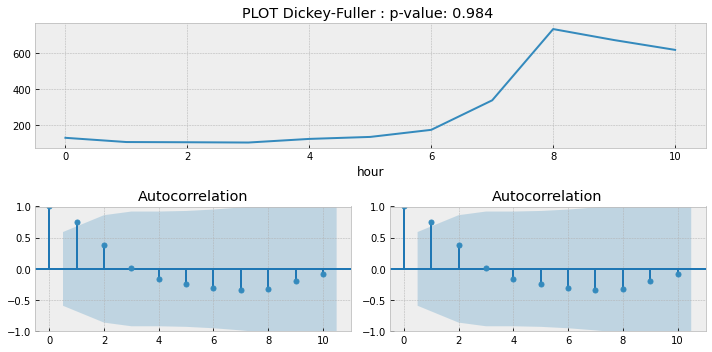

In [77]:
### 몇개의 샘플 뽑아서 계산
tsplot(day_pivot.iloc[:,2][:11], maxlag=3)

### 일보다 작은 시간단위에서는 주기성이 없으므로, 정상 데이터

### Auto arima

### 일단위 예측

In [26]:
df_fil = df.groupby(['year_day'], as_index=False).agg(
    avg_load = ('load', 'mean')
)
df_fil['year_day'] = pd.to_datetime(df_fil['year_day'])
df_fil = df_fil.set_index('year_day')
df_fil

avg_load
year_day              
2018-07-01  159.487049
2018-07-02  379.548632
2018-07-03  337.542028
2018-07-04  328.728361
2018-07-05  333.111049
...                ...
2019-12-27  264.951424
2019-12-28  125.915667
2019-12-29  110.837438
2019-12-30   93.387938
2019-12-31   92.833660

[549 rows x 1 columns]

<Axes: xlabel='year_day'>

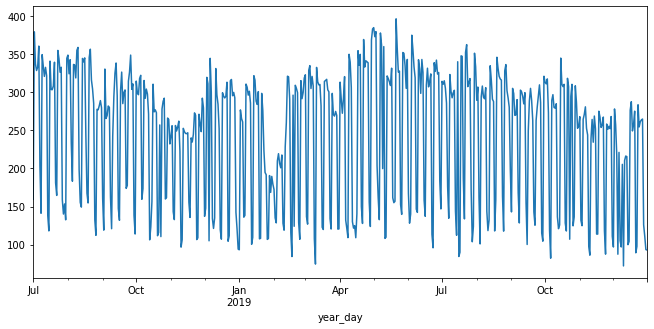

In [27]:
df_fil['avg_load'].plot(figsize=(11,5))

In [28]:
### 전체 데이터에서 train / test 부분 나눔
# df = df.set_index('Date')

criteria = '2019-05-31'

y_train = df_fil.loc[df_fil.index <= criteria] 
y_test = df_fil.loc[df_fil.index > criteria]

y_train.shape , y_test.shape

((335, 1), (214, 1))

In [29]:
### seaonal 성분은 일단위 패턴이 있으므로 1분단위 데이터 * 60 (=1시간) * 24 = 1440 개
### 일단위 데이터면 

auto_arima_model = pm.auto_arima(
                             y_train['avg_load'], 
                             start_p=0,d=1,start_q=0,
                             max_p=3,max_d=1,max_q=3, 
                             start_P=0, D=1, start_Q=0, 
                             max_P=3,max_D=1,max_Q=3,
                             m=7,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True, 
                             stepwise=False
                            )

auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=3863.626, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=inf, Time=1.40 sec
 ARIMA(0,1,0)(0,1,3)[7]             : AIC=inf, Time=1.84 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=3753.600, Time=0.14 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=1.00 sec
 ARIMA(0,1,0)(1,1,3)[7]             : AIC=inf, Time=1.72 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=3720.040, Time=0.24 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=inf, Time=2.73 sec
 ARIMA(0,1,0)(2,1,3)[7]             : AIC=inf, Time=7.82 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=3703.241, Time=0.59 sec
 ARIMA(0,1,0)(3,1,1)[7]             : AIC=inf, Time=1.91 sec
 ARIMA(0,1,0)(3,1,2)[7]             : AIC=inf, Time=2.96 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=inf, Time=0.15 sec
 ARI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  335
Model:             SARIMAX(0, 1, 1)x(3, 1, [], 7)   Log Likelihood               -1774.699
Date:                            Thu, 23 Mar 2023   AIC                           3559.397
Time:                                    12:00:21   BIC                           3578.347
Sample:                                07-01-2018   HQIC                          3566.959
                                     - 05-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8301      0.029    -28.857      0.000      -0.887      -0.774
ar.S.L7       -0.7996      0.041    -19.278      0.000      -0.881      -0.718
ar.S.L14      -0.5195      0.044    -11.844      0.000      -0.605      -0.434
ar.S.L21      -0.2830      0.046     -6.114      0.000      -0.374      -0.192
sigma2      2964.7927    154.446     19.196      0.000    2662.084    3267.502
===================================================================================
Ljung-Box (L1) (Q):                   1.63   Jarque-Bera (JB):               170.32
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               1.74   Skew:                            -1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 학습된 모델로 한번에 y_test 갯수만큼 예측을 수행

Test RMSE: 72.617


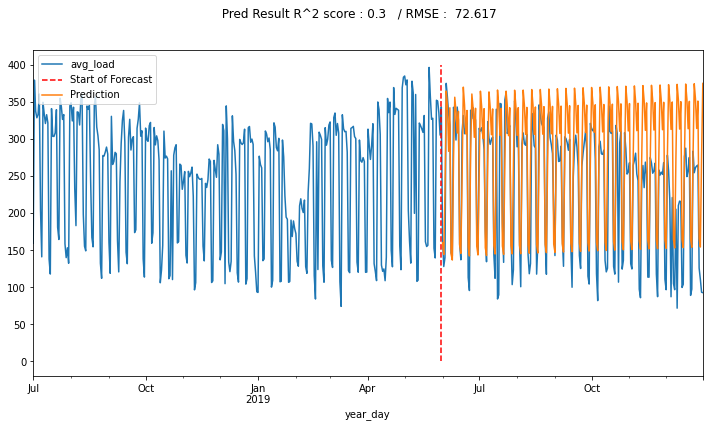

In [38]:
pred = auto_arima_model.predict(n_periods =len(y_test), return_conf_int=True)

pred_val = pred[0]
# pred_ub = pred[1][:,0]
# pred_lb = pred[1][:,1]
pred_index = list(y_test.index)

r2 = r2_score(y_test['avg_load'].values, pred_val)

fig, ax = plt.subplots(figsize=(12, 6))
df_fil['avg_load'].plot(ax =ax)
ax.vlines(criteria,0, 400, linestyle='--',color='r', label='Start of Forecast')
ax.plot(pred_index, pred_val, label='Prediction')
# ax.fill_between(pred_index, pred_lb, pred_ub, color='k', alpha=0.1, label='0.95 pred Interval')

ax.legend(loc='upper left')

rmse = np.sqrt(mean_squared_error(y_test['avg_load'].values, pred_val))
print('Test RMSE: %.3f' % rmse)

plt.suptitle(f' Pred Result R^2 score : {round(r2, 2)}   / RMSE : {rmse : .3f}')
plt.show()

### 모델에 새로운 관측치 추가해가면서 다시 학습시켜가면서 예측

predicted=161.705444, expected=167.408792
predicted=148.248244, expected=128.097306
predicted=253.054894, expected=140.171694
predicted=367.278040, expected=375.180750
predicted=347.369775, expected=356.488493
predicted=294.098772, expected=333.557681
predicted=344.825484, expected=319.145889
predicted=153.848050, expected=146.526104
predicted=137.612243, expected=142.295986
predicted=248.709549, expected=342.892597
predicted=365.917573, expected=330.855785
predicted=346.364452, expected=298.719208
predicted=322.646847, expected=343.237757
predicted=336.137294, expected=326.181854
predicted=162.265346, expected=158.467556
predicted=144.917378, expected=137.156104
predicted=234.725575, expected=309.513049
predicted=368.086741, expected=331.793556
predicted=341.091025, expected=307.277174
predicted=325.847379, expected=314.562181
predicted=331.993133, expected=324.294944
predicted=159.377739, expected=113.344681
predicted=140.550624, expected=95.708944
predicted=296.323557, expected=338.

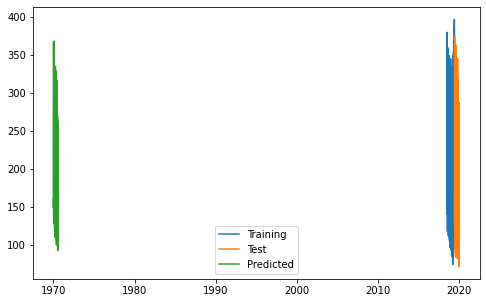

In [45]:
# Best model:  ARIMA(0,1,1)(3,1,0)[7]  

history = [x for x in y_train['avg_load']]
predictions = list()
# walk-forward validation
for idx in range(len(y_test)):
  ### 위에서 생성한 모델 생성
  model = SARIMAX(history, order=(0,1,1), seasonal_order = (3,1,0,7),initialization='approximate_diffuse')
  ## 학습하기
  model_fit = model.fit()

  ## n개를 예측하기 
  output = model_fit.forecast(n_periods=1)

  ## 측할 결과를 predcition 배열에 저장
  yhat = output[0]
  predictions.append(yhat)

  ## y_test의 값은 새로운 값이므로, 이것을 다시 history에 넣어음
  obs = y_test.iloc[idx]['avg_load']
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rmse)

### prediction 데이터를 test index와 동일하게 변환
predictions_df=pd.DataFrame(predictions , index=y_test.index)

# plot forecasts against actual outcomes
plt.figure(figsize=(15,5))
plt.plot(y_train,label="Training")
plt.plot(y_test,label="Test")
plt.plot(predictions_df,label="Predicted")
plt.legend(loc = 'best')
plt.tick_params(axis='x',labelrotation=45)
plt.show()

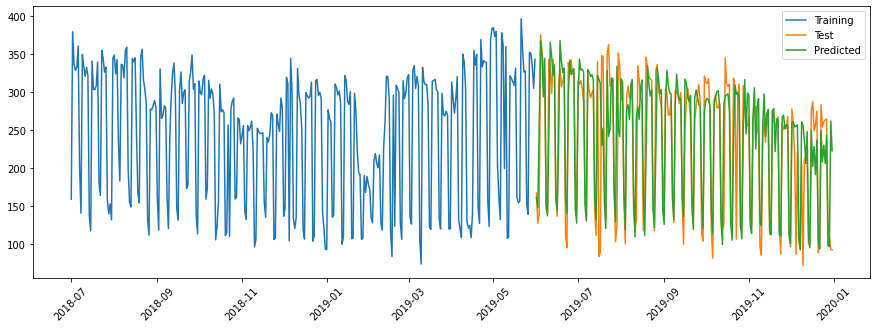

In [53]:
plt.figure(figsize=(15,5))
plt.plot(y_train,label="Training")
plt.plot(y_test,label="Test")
plt.plot(predictions_df,label="Predicted")
plt.legend(loc = 'best')
plt.tick_params(axis='x',labelrotation=45)
plt.show()